# In this notebook we will import, augmentation and extract features from raw data

## Process data to dataframe

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

In [2]:
# Define dataset paths
Ravdess = "../data/raw/ravdess/audio_speech_actors_01-24/"
Crema = "../data/raw/crema_d/AudioWAV/"
Tess = "../data/raw/tess/TESS Toronto emotional speech set data/"
Savee = "../data/raw/savee/ALL/"

In [3]:
# Check the sound of an example file
example_file = os.path.join(Ravdess, "Actor_01/03-01-01-01-01-01-01.wav")
data,sr = librosa.load(example_file)
ipd.Audio(data, rate=sr)

In [4]:
# Ravdess Datset

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
total_file = 0
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + i)
    total_file += len(actor)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + i + '/' + f)

print("Total number of audio files in RAVDESS dataset: ", total_file)
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

Total number of audio files in RAVDESS dataset:  1440
03-01-01-01-01-01-24.wav
03
../data/raw/ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [5]:
# dataframe for emotion of All dataset files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
print(emotion_df['Emotions'].unique())
print('Total NaN values in emotion column: ', emotion_df['Emotions'].isnull().sum())


[1 2 3 4 5 6 7 8]
Total NaN values in emotion column:  0


In [6]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'})
print(Ravdess_df.head())
print("______________________________________________")
print(Ravdess_df.tail())
print("_______________________________________________")
print(Ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  ../data/raw/ravdess/audio_speech_actors_01-24/...
1  neutral  ../data/raw/ravdess/audio_speech_actors_01-24/...
2  neutral  ../data/raw/ravdess/audio_speech_actors_01-24/...
3  neutral  ../data/raw/ravdess/audio_speech_actors_01-24/...
4  neutral  ../data/raw/ravdess/audio_speech_actors_01-24/...
______________________________________________
      Emotions                                               Path
1435  surprise  ../data/raw/ravdess/audio_speech_actors_01-24/...
1436  surprise  ../data/raw/ravdess/audio_speech_actors_01-24/...
1437  surprise  ../data/raw/ravdess/audio_speech_actors_01-24/...
1438  surprise  ../data/raw/ravdess/audio_speech_actors_01-24/...
1439  surprise  ../data/raw/ravdess/audio_speech_actors_01-24/...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

In [7]:
# Crema Dataset

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [8]:
# Tess Dataset

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


In [9]:
# SAVEE Dataset

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64



In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  12162 non-null  object
 1   Path      12162 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


In [11]:
# Total number of files in all dataset
len(data_path)

12162

In [12]:
# Distribution of emotions in the entire dataset
print(data_path.Emotions.value_counts())

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64


We can see that surprise emotion files are the least, so we need to make more speech files of this type to make the dataset balenced. Do the same thing with others to increase the flexibility of model

Librosa is a common Python library to analyze and process audio, especially music.  
We gonna use it to process our files

In [13]:
# First let's extract audio signals and their sampling rates from the file paths and store them in lists.
data, sr = librosa.load(file_path[0])
print(file_path[0])
print(data, sr)

../data/raw/savee/ALL/DC_a01.wav
[0.03548561 0.05175975 0.0457577  ... 0.04195745 0.04038322 0.04235241] 22050


In [14]:
# Check the audio signal and sampling rate
ipd.Audio(data,rate=sr)

Now we gonna create 2 critical features of this audio : Log Mel Spectrogram and Mel-Frequency Cepstral Coefficients (MFCCs)  
Why should we choose 2 these features, please read the Features_speech.md, I explained all relative things.

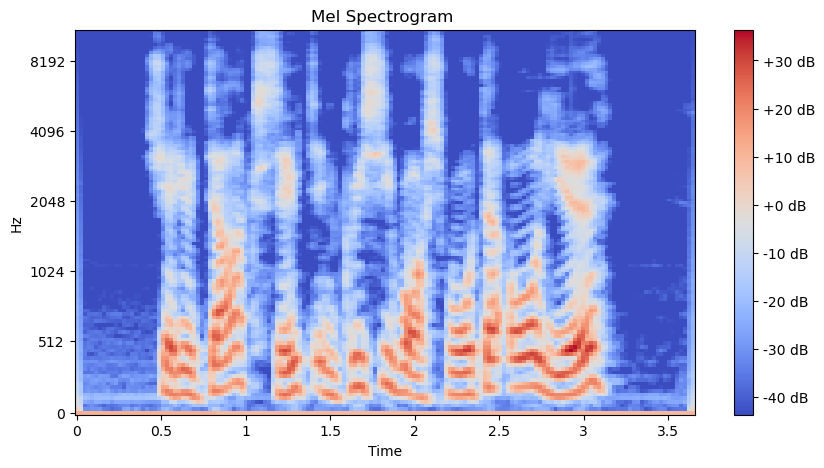

In [15]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

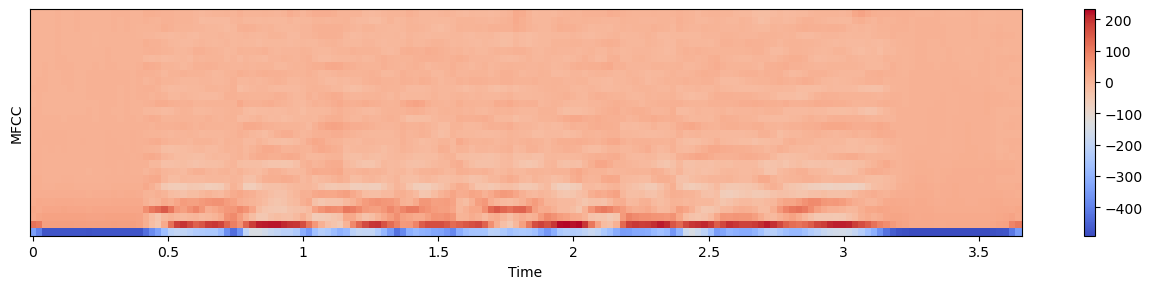

In [16]:
# Mel-Frequency Cepstral Coefficients (MFCCs)
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

## Data Augmentation

In [17]:
def plot_spectrogram(spec_data: np.ndarray, sr: int, n_mels: int, title: str):
    """
    Hiển thị Mel Spectrogram.
    """
    plt.figure(figsize=(10, 4))
    
    # Sử dụng librosa.display.specshow để hiển thị Spectrogram một cách chính xác
    # Tuy nhiên, nếu không muốn phụ thuộc librosa.display, ta có thể dùng plt.imshow
    librosa.display.specshow(spec_data, sr=sr, x_axis='time', y_axis='mel', fmax=sr/2)
    
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

Let's demo some data augmentation techniques

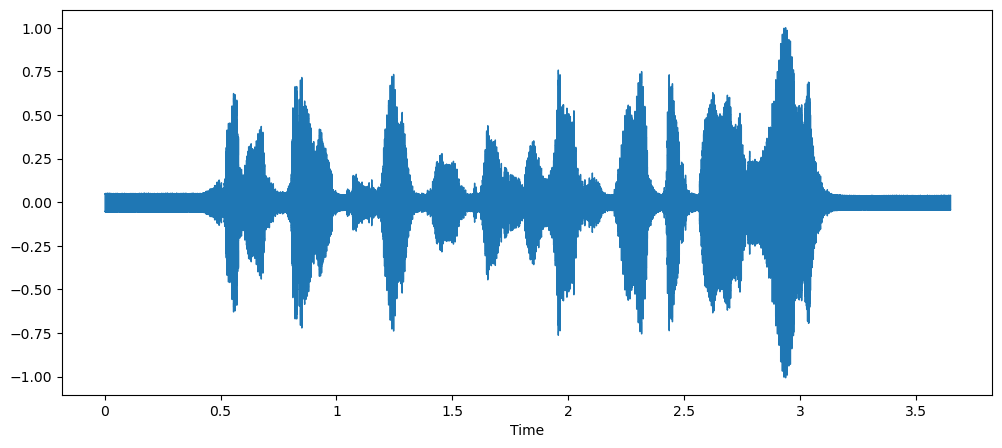

In [18]:
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

In [19]:
# Import necessary functions for data augmentation
import os,sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__name__))))
from src.preprocess.data_augmentation import noise, shift, stretch, pitch, augment_data, frequency_masking, time_masking

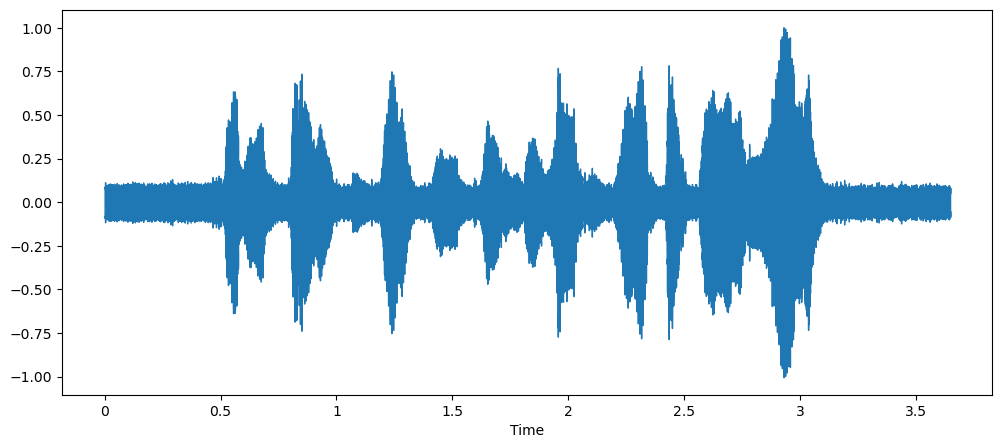

In [20]:
noise_data = noise(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=noise_data, sr=sr)
ipd.Audio(noise_data,rate=sr)

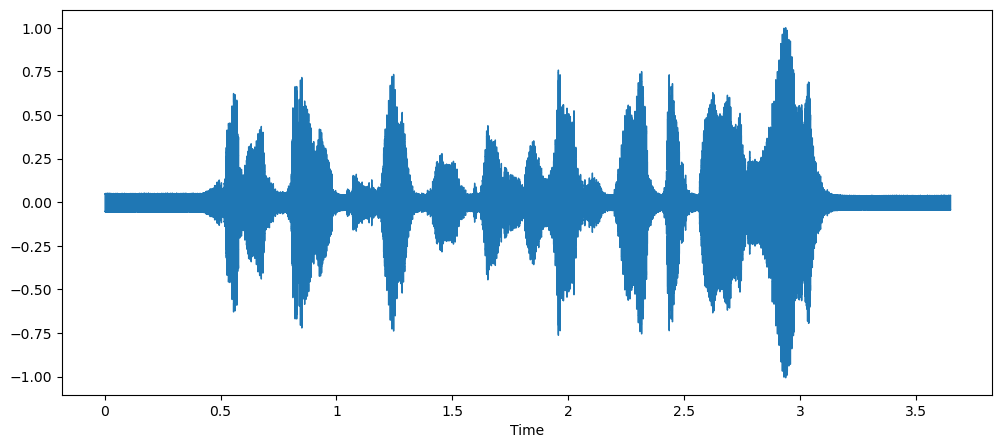

In [21]:
shifted_data = shift(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=shifted_data, sr=sr)
ipd.Audio(shifted_data,rate=sr)

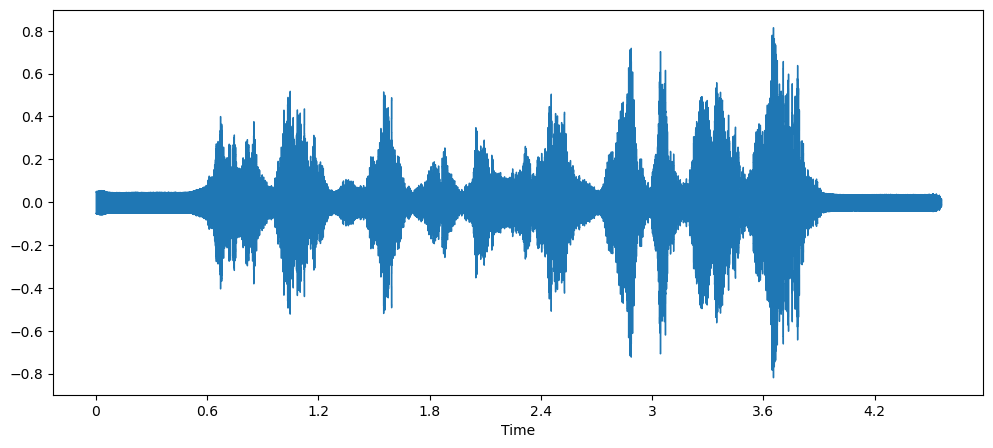

In [22]:
stretch_data = stretch(data, rate=0.8)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=stretch_data, sr=sr)
ipd.Audio(stretch_data,rate=sr)

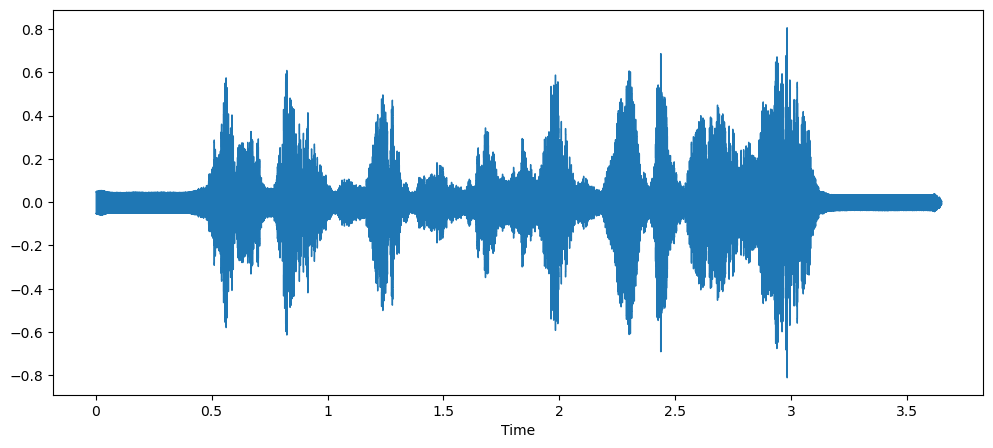

In [23]:
pitch_data = pitch(data, sr, pitch_factor=4)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=pitch_data, sr=sr)
ipd.Audio(pitch_data,rate=sr)

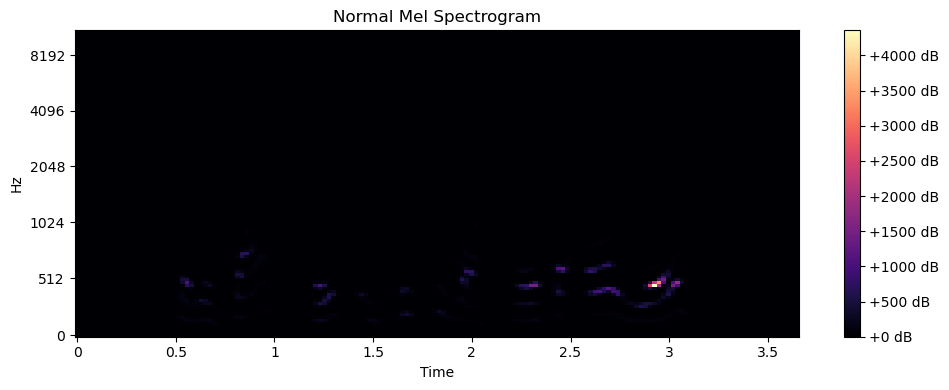

Speech rate: 22050
N mels: 128


In [24]:
# Demo frequency and time masking
# Normal spectrogram
plot_spectrogram(spectrogram, sr, n_mels=128, title='Normal Mel Spectrogram')
print('Speech rate:', sr)
print('N mels:', 128)
ipd.Audio(data,rate=sr)

Speech rate after freq masking: 22050
N mels after freq masking: 128


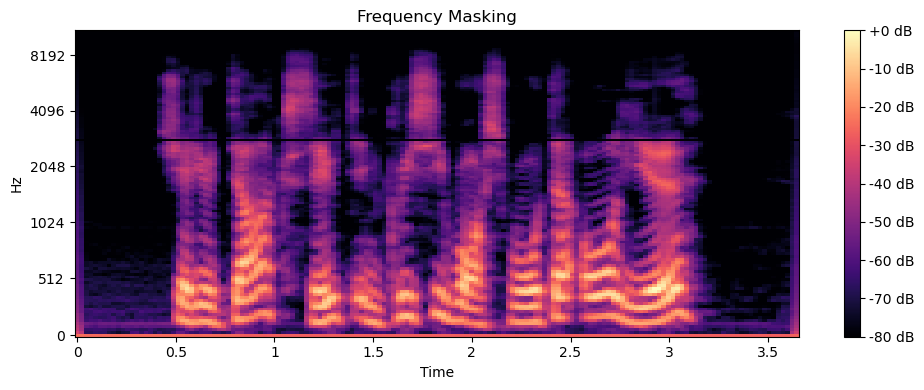

In [25]:
# Frequency Masking
log_mel_spec, sr, n_mels , old_data, reconstructed_audio = frequency_masking(file_path[0])
print('Speech rate after freq masking:', sr)
print('N mels after freq masking:', n_mels)
plot_spectrogram(log_mel_spec, sr, n_mels, title="Frequency Masking")
ipd.Audio(reconstructed_audio,rate=sr)

Speech rate after time masking: 22050
N mels after time masking: 128


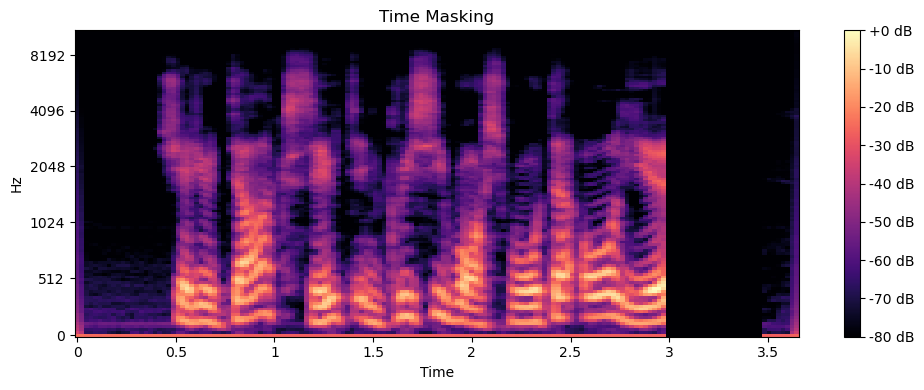

In [26]:
# Time Masking
log_mel_spec, sr, n_mels , old_data, reconstructed_audio = time_masking(file_path[0])
print('Speech rate after time masking:', sr)
print('N mels after time masking:', n_mels)
plot_spectrogram(log_mel_spec, sr, n_mels, title="Time Masking")
ipd.Audio(reconstructed_audio,rate=sr)

## Features extraction

In [27]:
from src.preprocess.features_extraction import get_features
import timeit
from tqdm import tqdm

start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start) 

0it [00:00, ?it/s]

4it [00:00, 17.21it/s]

0 audio has been processed


504it [00:28, 18.10it/s]

500 audio has been processed


1004it [00:56, 18.05it/s]

1000 audio has been processed


1505it [01:26, 18.23it/s]

1500 audio has been processed


2004it [01:56, 16.21it/s]

2000 audio has been processed


2503it [02:22, 20.39it/s]

2500 audio has been processed


3004it [02:48, 18.75it/s]

3000 audio has been processed


3505it [03:14, 20.41it/s]

3500 audio has been processed


4003it [03:41, 17.51it/s]

4000 audio has been processed


4503it [04:08, 17.26it/s]

4500 audio has been processed


5002it [04:39,  9.54it/s]

5000 audio has been processed


5502it [05:26,  8.40it/s]

5500 audio has been processed


6001it [06:15, 11.28it/s]

6000 audio has been processed


6502it [07:07,  8.29it/s]

6500 audio has been processed


7003it [07:58, 11.97it/s]

7000 audio has been processed


7502it [08:51, 10.28it/s]

7500 audio has been processed


8003it [09:36, 16.77it/s]

8000 audio has been processed


8504it [10:09, 16.20it/s]

8500 audio has been processed


9003it [10:41, 20.63it/s]

9000 audio has been processed


9504it [11:08, 19.10it/s]

9500 audio has been processed


10003it [11:41, 17.89it/s]

10000 audio has been processed


10502it [12:12, 12.99it/s]

10500 audio has been processed


11004it [12:43, 18.19it/s]

11000 audio has been processed


11502it [13:22, 11.61it/s]

11500 audio has been processed


12002it [14:19,  8.24it/s]

12000 audio has been processed


12162it [14:38, 13.84it/s]

Done
Time:  878.4990112


In [28]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [30]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('../data/processed/emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.231934,0.357422,0.482910,0.472656,0.480469,0.484375,0.491699,0.490723,0.500977,0.503418,...,1.594981,-1.356783,3.955091,1.570934,1.334768,0.901523,-0.066584,-6.374361,-7.761413,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.384766,0.576172,0.764160,0.778809,0.742188,0.752930,0.787109,0.799316,0.700195,0.590332,...,6.918442,6.534257,6.109815,5.613272,5.033775,4.383093,3.692577,3.005888,2.370324,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
